# John-Henry Pezzuto - Problem Set 4

### Data & Packages

In [1]:
#packages
import numpy as np
import scipy.optimize as opt
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import scipy.integrate as intgr
import numpy.linalg as lin
import statsmodels.api as sm

from pandas import Series, DataFrame


#logistic regression packages
import sklearn as sk
from sklearn import preprocessing
from sklearn import datasets, neighbors, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
import seaborn as sb
from linearmodels.iv import IV2SLS


plt.style.use("ggplot")
%matplotlib inline

#data
auto = pd.read_csv("Auto.csv", na_values = "?")

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1b) Produce Scatter Plot

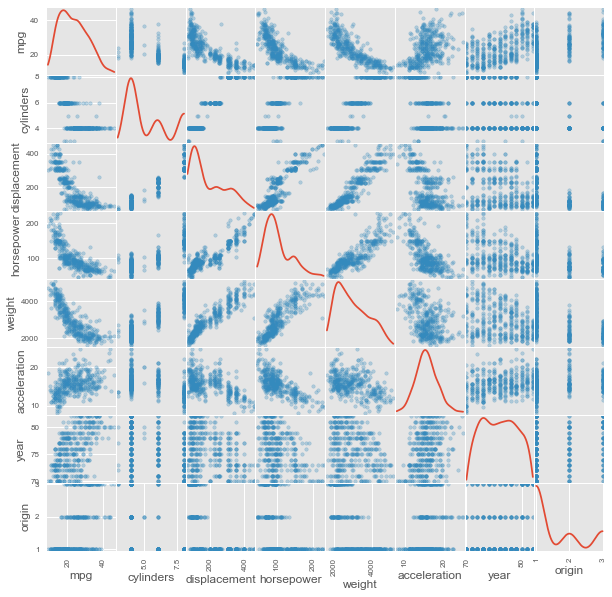

In [2]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(auto, alpha=0.3, figsize=(10, 10),
diagonal='kde')
plt.show()

### 1c) Correlation Matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


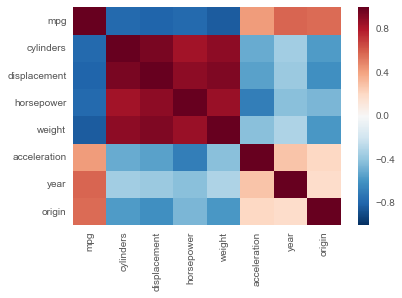

In [3]:
sb.heatmap(auto.corr())
auto.corr('pearson', 1)

### 1d) Estimate the Regression Model of MPG

In [4]:
auto['const']=1
reg1 = sm.OLS(endog=auto['mpg'], exog=auto[['const', 'cylinders' ,'displacement','horsepower','weight','acceleration','year','origin']], missing='drop')
type(reg1)
results = reg1.fit()
type(results)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        10:02:38   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i) Displacement, weight, year, & origin are significant at the 1% level  
ii) Horsepower, cylinders & acceleration are not significant at the 10% level  
iii) Year has a positive relationship, meaning if everything else remains constant, a 1 unit increase in year means MPG goes up .75

### 1e) What three variables are most likely to have a nonlinear relationship with mpg?

In [5]:
auto['year_squared'] = auto['year']*auto['year']
auto['origin_squared'] = auto['origin']*auto['origin']
auto['cylinders_squared'] = auto['cylinders']*auto['cylinders']
auto['acceleration_squared'] = auto['acceleration']*auto['acceleration']

In [6]:
reg2 = sm.OLS(auto['mpg'], auto[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin', 'year_squared', 
                                       'origin_squared', 'cylinders_squared', 'acceleration_squared']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     193.1
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          4.38e-148
Time:                        10:02:38   Log-Likelihood:                -991.59
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     380   BIC:                             2055.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  409.7765 

ii) My adjusted R squared is .844. It is better than the adjusted R squared from part d  
iii) The displacement coefficient  became significant is still not significant at the .1 level. The relationship in displacement became a little less postively assoicated with mpg 
iv) Cylinders became more significant. It was originally above the 10% significance level and feel near the 1% significance level  

### 1f) Predicting the mpg of a Car

In [7]:
prediction =results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 99**2, 1**2, 6**2, 15.1**2])[0]

print("The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1 is:\n", prediction, "mpg")

The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1 is:
 74.0595346002 mpg


## 2) KNN

In [8]:
# Make a dataframe
table = {'x1' : [0, 2, 0 , 0, -1, 1],
        'x2' : [3, 0, 1, 1, 0, 1], 
        'x3' : [0, 0, 3, 2, 1, 1], 
        'y' : ['r', 'r', 'r', 'g', 'g', 'r']}

table

knn = pd.DataFrame(data = table)

# add column
knn['e_dist'] = np.sqrt(knn['x1']**2 + knn['x2']**2 + knn['x3']**2)
knn.loc[:,'y':'e_dist']


,y,e_dist
0,r,3.000000
1,r,2.000000
2,r,3.162278
3,g,2.236068
4,g,1.414214
5,r,1.732051


In [9]:
knn

,x1,x2,x3,y,e_dist
0,0,3,0,r,3.000000
1,2,0,0,r,2.000000
2,0,1,3,r,3.162278
3,0,1,2,g,2.236068
4,-1,0,1,g,1.414214
5,1,1,1,r,1.732051


### b) K = 1

In [10]:
print("At k = 1, whatever point is closest to 0,0,0 would be the color -- in this case the point to be green")

At k = 1, whatever point is closest to 0,0,0 would be the color -- in this case the point to be green


### c) K = 3

In [11]:
print("At K =3, we need to look at the average (color) of 3 smallest points, which based on row 1, 4 & 5 is going to be the color red")
knn.sort_values(ascending=True, by='e_dist')

At K =3, we need to look at the average (color) of 3 smallest points, which based on row 1, 4 & 5 is going to be the color red


,x1,x2,x3,y,e_dist
4,-1,0,1,g,1.414214
5,1,1,1,r,1.732051
1,2,0,0,r,2.000000
3,0,1,2,g,2.236068
0,0,3,0,r,3.000000
2,0,1,3,r,3.162278


### (d) If the Bayes (optimal) decision boundary is highly nonlinear

Based on our class discussion, it is likely that the optimal decision boundary involves **a low k value** because @@@@

### e) Estimate Test Point 1 w/ K = 2

In [12]:
y = knn['y'] #result column 
x = np.column_stack((knn['x1'], knn['x2'], knn['x3']))
knn_classifier = sk.neighbors.KNeighborsClassifier(n_neighbors=2)# k = 2 
results3 = knn_classifier.fit(x, y)
print(results3.predict([(1, 1, 1)]))

print("The expected result would be green")

['g']
The expected result would be green


## 3) Multivariable logistic (logit) regression

In [13]:
auto = pd.read_csv("Auto.csv", na_values = "?")
auto['const']=1
# create a new var equals 1 if mpg_high = median(mpg high) and equals 0 if mpg_high< median(mpg high)

mpgmedian= auto['mpg'].median()
auto['mpg_high'] = auto['mpg'].apply(lambda x: 1 if x >= mpgmedian else 0) #conditional to add 1 and 0s


### 3a) Use statsmodel.api to estimate the logistic regression

In [14]:
LogitModel = sm.Logit(auto['mpg_high'], auto[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin']], missing = 'drop')

In [15]:
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        10:02:38   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Both the weight and year coefficients are statistically significant at the 5% level.

### 3b) Split the Data

In [16]:
auto = auto.dropna(axis = 0, how = 'any')

y = auto['mpg_high']
X = np.column_stack((auto['const'],auto['cylinders'], auto['displacement'], auto['weight'], auto['horsepower'],
                     auto['acceleration'], auto['year'], auto['origin'])) 


#split the data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.5, random_state=10)
X

array([[   1. ,    8. ,  307. , ...,   12. ,   70. ,    1. ],
       [   1. ,    8. ,  350. , ...,   11.5,   70. ,    1. ],
       [   1. ,    8. ,  318. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   1. ,    4. ,  135. , ...,   11.6,   82. ,    1. ],
       [   1. ,    4. ,  120. , ...,   18.6,   82. ,    1. ],
       [   1. ,    4. ,  119. , ...,   19.4,   82. ,    1. ]])

### 3c) Use scikit-learn to estimate a logistic regression model on the training data.

In [18]:
LogReg = LogisticRegression()
results5 = LogReg.fit(X_train, y_train)
print('The intercept is',results5.intercept_[0])
print('The coefficients are', results5.coef_[0])

The intercept is -0.0689581697141
The coefficients are [-0.06895817 -0.6622853   0.00581711 -0.0050335  -0.03869694 -0.13888986
  0.30034626 -0.15084258]


### 3d) Create predicted values of mpg high for the test set and calculate the confusion matrix and classification report for the Logit model on the test data

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



This model predicts (mpg high=0) just slightly better